LGM VIP: Data Science Internship

1.Beginner Level Task (2.Stock Market Prediction And Forecasting Using Stacked LSTM)

***NAME : Kale Dipali***

Dataset : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [ ]:
from google . colab import drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")



```
# This is formatted as code
```

**Reading the Dataset** 



In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Data Sorting**

In [4]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [5]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Visualization


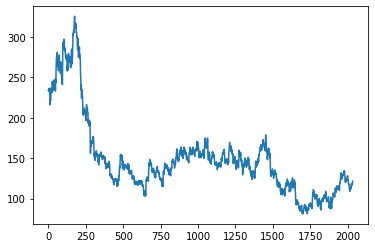

In [ ]:
plt.plot(df['Close'])

In [ ]:
dff=df['Close']
dff

2034    121.55
2033    120.90
2032    120.65
2031    117.60
2030    118.65
         ...  
4       233.30
3       236.10
2       234.25
1       233.25
0       233.75
Name: Close, Length: 2035, dtype: float64

Min Max Scaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

***Spliting The Dataset*** 

In [ ]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

**convert an array of values into a dataset Matrix**

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

**Spliting Data into Train and Test**

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Creating the LSTM Model**

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 3s 161ms/step - loss: 2.2802e-04 - val_loss: 4.0260e-04
Epoch 2/60
19/19 [==============================] - 4s 239ms/step - loss: 2.2085e-04 - val_loss: 1.7591e-04
Epoch 3/60
19/19 [==============================] - 7s 356ms/step - loss: 2.0477e-04 - val_loss: 2.3985e-04
Epoch 4/60
19/19 [==============================] - 3s 170ms/step - loss: 2.1256e-04 - val_loss: 2.4199e-04
Epoch 5/60
19/19 [==============================] - 3s 162ms/step - loss: 2.1290e-04 - val_loss: 2.2445e-04
Epoch 6/60
19/19 [==============================] - 3s 163ms/step - loss: 1.9635e-04 - val_loss: 1.6978e-04
Epoch 7/60
19/19 [==============================] - 3s 157ms/step - loss: 1.8422e-04 - val_loss: 1.4979e-04
Epoch 8/60
19/19 [==============================] - 3s 161ms/step - loss: 1.7717e-04 - val_loss: 1.5494e-04
Epoch 9/60
19/19 [==============================] - 3s 162ms/step - loss: 1.8280e-04 - val_loss: 1.8609e-04
Epoch 10/60
19/19 [=========

**PREDICTION**

In [ ]:
test_predict=model.predict(X_test)

In [ ]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[0.25227123],
       [0.25287515],
       [0.24933243],
       [0.2387487 ],
       [0.23141326],
       [0.22900225],
       [0.23397166],
       [0.24109575],
       [0.24329703],
       [0.24134557],
       [0.23924486],
       [0.24305679],
       [0.24666212],
       [0.25347692],
       [0.26285645],
       [0.25610477],
       [0.24567936],
       [0.24280393],
       [0.24541916],
       [0.26595056],
       [0.2858184 ],
       [0.29563457],
       [0.29596534],
       [0.28605556],
       [0.28335455],
       [0.28303796],
       [0.28621235],
       [0.29425892],
       [0.29823825],
       [0.29788458],
       [0.2979872 ],
       [0.2925769 ],
       [0.27920592],
       [0.256191  ],
       [0.24107242],
       [0.2366508 ],
       [0.23818988],
       [0.23620884],
       [0.22700353],
       [0.2111097 ],
       [0.19906491],
       [0.19326971],
       [0.18561526],
       [0.18267187],
       [0.17541192],
       [0.16519995],
       [0.16160548],
       [0.160

**Calculating performance**

In [ ]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.04792720343180673